# [writ3it.tech](https://www.writ3it.tech/) Presentation appendix [PL]
## Deutsch–Jozsa problem

Dana jest funkcja f(x1, x2, x3, ..., xn), która może być **stała** lub **zbalansowana**. Argumenty funkcji x1,x2,x3, ..., xn są binarne tj. przyjmują wartość 0 lub 1. Wynikiem funkcji jest 0 lub 1.
- Funkcja jest **stała**, jeżeli dla dowolnych danych wejściowych funkcja zwraca 1 (alternatywnie 0).
- Funkcja jest **zbilansowana**, jeżeli dla połowy kombinacji argumentów funkcja zwraca 0, a dla drugiej połowy 1.

**Zadaniem** programu jest określenie jakiego typu jest zadana funkcja f. Sposób rozwiązywania tego problemu zwany został przedstawiony na schemacie *Ogólnego obwodu kwantowego*. Algorytm nie znajduje praktycznego zastosowania. Pełni jednak bardzo istotną rolę ponieważ jest przykładem znaczącego wzrostu wydajności, który uwidacznia się w podanych niżej złożonościach obliczeniowych.

### Złożoność obliczeniowa

- Złożoność algorytmu na komputerze klasycznym: O(2^(n-1) + 1)
- Złożoność algorytmu na komputerze kwantowym: O(1)


### Ogólny obwód kwantowy

(source: wikipedia.org)
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b5/Deutsch-Jozsa-algorithm-quantum-circuit.png" alt="Drawing" style="width: 600px;"/>

Algorytm składa się z trzech etapów:
1. Inicjalizacji stanu kubitów
2. Obliczenia wartości funkcji f (bramka Uf)
3. Zakończenie przetwarzania układem bramek Hadamarda oraz pomiar stanu końcowego programu

### Program kwantowy

Poniżej przedstawiono sposób implementacji programu kwantowego wraz z jego uruchomieniem na symulatorze oraz komputerze kwantowym w ramach usługi [IBMQ](https://www.ibm.com/quantum-computing/) świadczonej przez firmę IBM. W tym celu wykorzystano SDK o nazwie Qiskit oraz język Python w wersji 3.7. 

Aby powtórzyć eksperyment w domowym zaciszu wystarczy, że:
1. Zainstalujesz Python np. [Anacondę](https://www.anaconda.com/distribution/)
2. Zainstalujesz moduł [Jupyter Notebook](https://jupyter.org/install)
3. Zainstalujesz SDK [Qiskit](https://qiskit.org/documentation/install.html)
4. Zarejestrujesz się w usłudze [IBMQ](https://www.ibm.com/quantum-computing/).

Następnie:
1. Pobierz plik Notebook, który właśnie czytasz.
2. Otwórz go w Jupyter Notebook

### Krok 1. Załadowanie niezbędnych bibliotek

In [1]:
import qiskit.tools.jupyter
from qiskit import(
  QuantumCircuit,
  QuantumRegister,
  ClassicalRegister,
  execute,
  Aer)
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_histogram
from qiskit import IBMQ

### Krok 2. Budowa obwodu kwantowego (funkcja zbilansowana)

W prezentowanym przykładzie funkcja f(...) będzie przyjmować 4 argumenty, których rolę pełnią kubity data_0, data_1, data_2, data_3 zgropowanych w rejestr *data_qubits*. Wynik funkcji jest zapisywany w kubicie helper_0 należącego do rejestru *helper_qubits*. Ostatecznie wynik programu, czyli decyzja o tym czy funkcja jest zbilansowana lub stała, zostaje zapisany w klasycznym rejestrze bitowym *output_bits* zbudowanym z bitów out_0, out_1, out_2, out_3.

Cechą charakterystyczną, odróżniającą podejście kwantowe od klasycznego jest fakt, że o wyniku programu decydują dane zapisane w przetworzonych argumentach (kubitach) a nie, jak to możnaby się spodziewać wyniku. To podejście jest wynikiem wykorzystania zjawisk kwantowych zachodzących w komputerze kwantoym w trakcie przetwarzania.

In [2]:
data_qubits = QuantumRegister(4, 'data')
helper_qubits = QuantumRegister(1, 'help')
output_bits = ClassicalRegister(4, 'out')

dj_circuit = QuantumCircuit(data_qubits,helper_qubits,output_bits) 

Algorytm rozpoczyna się od inicjalizacji poszczególnych rejestrów. Początkowo kubity rejestru *data_qubits* są w stanie 0 po czym zostają wprowadzone w stan "superpozycji" za pomocą bramek Hadamarda. Analogicznie inicjalizowany jest rejestr *helper_qubits*, który jest wprowadzany w stan "superpozycji" ze stanu 1. "Superpozycja" pełni rolę tak zwanego "kwantowego paralelizmu", który pozwala przetwarzać "jednocześnie" wszystkie możliwe kombinacje argumentów funkcji f.

In [3]:
## superposition from 0-state
dj_circuit.h(data_qubits) 

## superposition from 1-state
dj_circuit.x(helper_qubits) 
dj_circuit.h(helper_qubits)

## separator
dj_circuit.barrier(data_qubits,helper_qubits)

dj_circuit.draw()

Kolejnym etapem algorytmu jest przetworzenie kubitów znajdujących się w "superpozycji" funkcją f(..). W tym przypadku funkcja ta przyjmuje następującą postać:

**f(x1, x2, x3, x4) = x1**

Ponieważ argument x1 przyjmuje tylko jeden z dwóch stanów (0 lub 1) funkcja f zwraca 0 dla połowy kombinacji argumentów oraz 1 dla drugiej połowy, co czyni ją funkcją zbilansowaną. 

In [4]:
## Uf implementation
dj_circuit.cx(data_qubits[0], helper_qubits[0])
## separator
dj_circuit.barrier(data_qubits,helper_qubits)

dj_circuit.draw()

Ostatnim krokiem jest ponowne przetworzenie kubitów *data_qubits* (!) układem bramek Hadamarda. Przetwarzanie zakończone zostało operacjami pomiaru stanu. 

Jeżeli zmierzony stan będzie równy kombinacji bitów 0000 (czyli wszystkie kubity będą znajdowały się w stanie 0) oznacza to, że funkcja f jest stała. W każdym innym przypadku świadczy to o zbilansowanym charakterze funkcji f. 

In [5]:
# Step 3. Hadamard
dj_circuit.h(data_qubits) 
# Step 4. Measurment
dj_circuit.measure(data_qubits, output_bits)
# draw
dj_circuit.draw()

### Krok 3. Wykonanie programu kwantowego

Możliwe wyniki:
- 0000 - constant
- other - balanced

In [6]:
# pobranie obiektu reprezentującego komputer kwantowy - w tym przypadku symulator
simulator = Aer.get_backend('qasm_simulator')

# obwód zostanie wykonany tylko raz z wykorzystaniem symulatora
job = execute(dj_circuit, simulator, shots=1)

Wynikiem działania programu jest ciąg bitów 0001, który oznacza, że funkcja jest zbilansowana (zgodnie z założeniem).

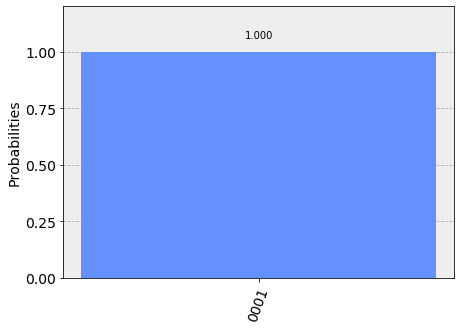

In [7]:
# pobranie i wyświetlenie wyników
result = job.result()
counts = result.get_counts(dj_circuit)
plot_histogram(counts)

### Krok 4. Wykonanie programu z wykorzystaniem komputera kwantowego
W poniższym fragmencie kodu zastęp ciąg znaków "token" swoim własnym kluczem API usługi IBMQ. 

In [8]:
# provide access token
IBMQ.enable_account('token')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [9]:
# pobranie obiektu reprezentującego komputer kwantowy z usługi IBMQ
provider = IBMQ.get_provider()
backend = provider.get_backend('ibmq_ourense')

# wykonanie programu
job = execute(dj_circuit, backend, shots=1)

Ostatecznie wynik symulatora potwierdza wynik przetwarzania uzyskany z wykorzystaniem komputera kwantowego. Można zauważyć, że wynik nie jest dokładnie identyczny z wynikiem symulatora. Różnice mają swoje źródło w wielu czynnikach związanych z niedoskonałościami symulatora jak i samego komputera kwantowego. 

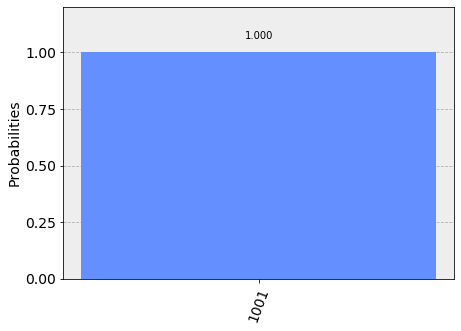

In [10]:
# wyświetlenie wyników
result = job.result()
counts = result.get_counts(dj_circuit)
plot_histogram(counts)